In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
uni_President=pd.read_csv('PythonBook_code_data/part5/30/1216.csv',sep='\t')
uni_President.index=pd.to_datetime(uni_President.Date)
uni_President.head()

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2015-06-01,2015-06-01,49.02,49.66,49.66,48.75,8941
2015-06-02,2015-06-02,49.84,49.11,50.02,48.93,11150
2015-06-03,2015-06-03,49.20,49.93,49.93,49.02,5111
2015-06-04,2015-06-04,48.84,49.11,49.29,48.20,7476
2015-06-05,2015-06-05,48.38,48.66,48.75,47.47,8480


In [5]:
Close=uni_President.Close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
closeDif.head()

Date
2015-06-02    0.82
2015-06-03   -0.64
2015-06-04   -0.36
2015-06-05   -0.46
2015-06-08    0.09
Name: Close, dtype: float64

In [6]:
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()


,Close,closeChange,upPrc,downPrc
Date,,,,
2015-06-02,49.84,0.82,0.82,0.00
2015-06-03,49.20,-0.64,0.00,0.64
2015-06-04,48.84,-0.36,0.00,0.36
2015-06-05,48.38,-0.46,0.00,0.46
2015-06-08,48.47,0.09,0.09,0.00


In [7]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [8]:
rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(len(SMUP))]

In [9]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    387.000000
mean      49.580358
std       21.772020
min        0.000000
25%       36.203156
50%       50.000000
75%       65.692472
max      100.000000
dtype: float64

In [10]:
def rsi(price,period=6):
    import pandas as pd
    closeDif=(price-price.shift(1)).dropna()
    upPrc=pd.Series(0,index=closeDif.index)
    upPrc[closeDif>0]=closeDif[closeDif>0]
    downPrc=pd.Series(0,index=closeDif.index)
    downPrc[closeDif<0]=-closeDif[closeDif<0]
    rsi=[]
    for i in range(period,len(upPrc)+1):
        up_mean = np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32)
        up_down = np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32)
        rsi.append(100*up_mean/(up_mean+up_down))
    rsi=pd.Series(rsi,index=closeDif.index[(period-1):])
    return(rsi)

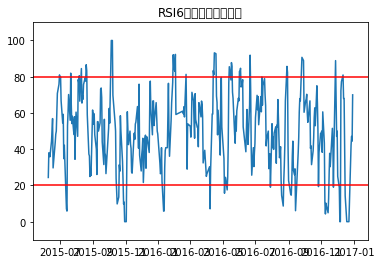

In [11]:
Rsi12=rsi(Close,12)
Rsi12.tail()

Rsi24=rsi(Close,24)
Rsi24.tail()


plt.plot(Rsi6)
plt.title('RSI6的超買線和超賣線')
plt.ylim(-10,110)
plt.axhline(y=80,color='red')
plt.axhline(y=20,color='red')
plt.show()


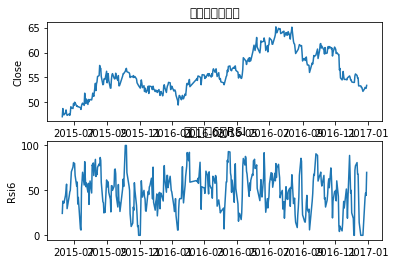

In [12]:
#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('統一股票6日RSI')
plt.show()

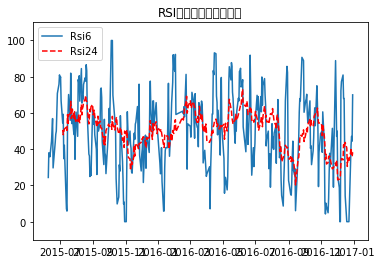

In [13]:
#黃金交叉和死亡交叉
plt.plot(Rsi6,label='Rsi6')
plt.plot(Rsi24,
         label='Rsi24',color='red',\
         linestyle='dashed')
plt.title('RSI黃金交叉和死亡交叉')
plt.ylim(-10,110)
plt.legend()
plt.show()

In [15]:
#strategy
#uni_President=pd.read_csv('1216.csv',sep='\t')
uni_President.index=pd.to_datetime(uni_President.Date)
Close =uni_President.Close
rsi6=rsi(Close,6)
rsi24=rsi(Close,24)

In [16]:
#rsi6捕捉买卖点
Sig1=[]
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [17]:
date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)

Date
2015-06-30   -1
2015-07-21   -1
2015-08-06   -1
dtype: int64

In [18]:
Signal2=pd.Series(0,index=rsi24.index)
lagrsi6= rsi6.shift(1)
lagrsi24= rsi24.shift(1)
for i in rsi24.index:
    if (rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
        Signal2[i]=1
    elif (rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
        Signal2[i]=-1

In [19]:
signal=Signal1+Signal2
signal[signal==2] = 1
signal[signal==-2] = -1
signal=signal.dropna()

In [20]:
tradSig=signal.shift(1)

In [21]:
ret=Close/Close.shift(1)-1
ret.head()

Date
2015-06-01         NaN
2015-06-02    0.016728
2015-06-03   -0.012841
2015-06-04   -0.007317
2015-06-05   -0.009419
Name: Close, dtype: float64

In [22]:
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

In [23]:
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

tradeRet=ret*tradSig

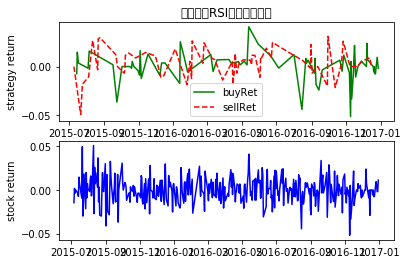

In [24]:
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',
    color='r',linestyle='dashed')
plt.title('統一股票RSI指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

In [25]:
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
           tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
             tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
winRate,0.562500,0.655172,0.601626
meanWin,0.010357,0.013396,0.011918
meanLoss,-0.012551,-0.012753,-0.012635


Text(0.5, 1.0, 'RSI指標交易策略累積收益率')

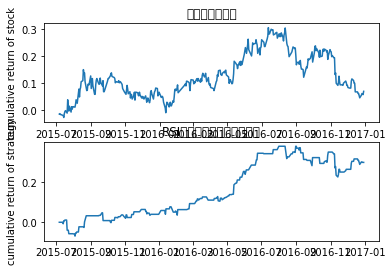

In [26]:
#累计收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')